In [1]:
# Import required libraries
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
import os

# Create cache directory if it doesn't exist
cache_dir = '/tmp/fastf1_cache'
os.makedirs(cache_dir, exist_ok=True)
fastf1.Cache.enable_cache(cache_dir)  # Enable caching to speed up data loading


print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Collection - Load All 2021 Races

First, we'll load all race sessions from the 2021 season and extract tyre compound information.

In [2]:
# Get 2021 season schedule
schedule_2021 = fastf1.get_event_schedule(2021)
races_2021 = schedule_2021[schedule_2021['EventFormat'] != 'testing']

print(f"Total races in 2021 season: {len(races_2021)}")
print("\nRaces:")
for idx, row in races_2021.iterrows():
    print(f"Round {row['RoundNumber']}: {row['EventName']} - {row['Country']}")

Total races in 2021 season: 22

Races:
Round 1: Bahrain Grand Prix - Bahrain
Round 2: Emilia Romagna Grand Prix - Italy
Round 3: Portuguese Grand Prix - Portugal
Round 4: Spanish Grand Prix - Spain
Round 5: Monaco Grand Prix - Monaco
Round 6: Azerbaijan Grand Prix - Azerbaijan
Round 7: French Grand Prix - France
Round 8: Styrian Grand Prix - Austria
Round 9: Austrian Grand Prix - Austria
Round 10: British Grand Prix - Great Britain
Round 11: Hungarian Grand Prix - Hungary
Round 12: Belgian Grand Prix - Belgium
Round 13: Dutch Grand Prix - Netherlands
Round 14: Italian Grand Prix - Italy
Round 15: Russian Grand Prix - Russia
Round 16: Turkish Grand Prix - Turkey
Round 17: United States Grand Prix - United States
Round 18: Mexico City Grand Prix - Mexico
Round 19: São Paulo Grand Prix - Brazil
Round 20: Qatar Grand Prix - Qatar
Round 21: Saudi Arabian Grand Prix - Saudi Arabia
Round 22: Abu Dhabi Grand Prix - Abu Dhabi


In [3]:
# Function to get compound mapping (SOFT/MEDIUM/HARD only)
def get_dry_compound(compound):
    """Map compound to SOFT, MEDIUM, HARD, or None for wet compounds"""
    if pd.isna(compound):
        return None
    compound = str(compound).upper()
    if 'SOFT' in compound:
        return 'SOFT'
    elif 'MEDIUM' in compound:
        return 'MEDIUM'
    elif 'HARD' in compound:
        return 'HARD'
    else:
        return None  # Wet/Intermediate compounds

print("Compound mapping function defined.")

Compound mapping function defined.


In [4]:
# Load all race data for 2021 season
all_race_data = []
failed_races = []

for idx, race_row in races_2021.iterrows():
    round_num = race_row['RoundNumber']
    race_name = race_row['EventName']
    country = race_row['Country']
    
    try:
        print(f"Loading Round {round_num}: {race_name}...", end=' ')
        
        # Load race session
        session = fastf1.get_session(2021, round_num, 'R')
        session.load()
        
        # Get laps data
        laps = session.laps
        
        # Get results for finishing positions
        results = session.results
        
        # Add race info to each lap
        laps_with_info = laps.copy()
        laps_with_info['RoundNumber'] = round_num
        laps_with_info['RaceName'] = race_name
        laps_with_info['Country'] = country
        
        # Map compounds to SOFT/MEDIUM/HARD
        laps_with_info['CompoundType'] = laps_with_info['Compound'].apply(get_dry_compound)
        
        # Merge with results to get finishing positions
        laps_with_info = laps_with_info.merge(
            results[['Abbreviation', 'Position', 'Points']],
            left_on='Driver',
            right_on='Abbreviation',
            how='left'
        )
        
        all_race_data.append(laps_with_info)
        print(f"✓ Loaded {len(laps_with_info)} laps")
        
    except Exception as e:
        print(f"✗ Failed: {str(e)}")
        failed_races.append((round_num, race_name, str(e)))

# Combine all race data
if all_race_data:
    all_laps_df = pd.concat(all_race_data, ignore_index=True)
    print(f"\n{'='*60}")
    print(f"Successfully loaded {len(all_race_data)} races")
    print(f"Total laps collected: {len(all_laps_df):,}")
    
    if failed_races:
        print(f"\nFailed to load {len(failed_races)} races:")
        for round_num, name, error in failed_races:
            print(f"  Round {round_num}: {name} - {error}")
else:
    print("No race data could be loaded!")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.7.0]


Loading Round 1: Bahrain Grand Prix... 

req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api          

✓ Loaded 1027 laps
Loading Round 2: Emilia Romagna Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 1127 laps
Loading Round 3: Portuguese Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 44: Ignoring late data f

✓ Loaded 1245 laps
Loading Round 4: Spanish Grand Prix... 

req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api          

✓ Loaded 1247 laps
Loading Round 5: Monaco Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 1420 laps
Loading Round 6: Azerbaijan Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 47: Ignoring late data f

✓ Loaded 943 laps
Loading Round 7: French Grand Prix... 

core           INFO 	Loading data for French Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

✓ Loaded 1051 laps
Loading Round 8: Styrian Grand Prix... 

core           INFO 	Loading data for Styrian Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

✓ Loaded 1296 laps
Loading Round 9: Austrian Grand Prix... 

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

✓ Loaded 1338 laps
Loading Round 10: British Grand Prix... 

core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

✓ Loaded 970 laps
Loading Round 11: Hungarian Grand Prix... 

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

✓ Loaded 985 laps
Loading Round 12: Belgian Grand Prix... 

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

✓ Loaded 60 laps
Loading Round 13: Dutch Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 1361 laps
Loading Round 14: Italian Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 892 laps
Loading Round 15: Russian Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 1025 laps
Loading Round 16: Turkish Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 1147 laps
Loading Round 17: United States Grand Prix... 

core           INFO 	Loading data for United States Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 

✓ Loaded 1044 laps
Loading Round 18: Mexico City Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 1261 laps
Loading Round 19: São Paulo Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 1360 laps
Loading Round 20: Qatar Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 1114 laps
Loading Round 21: Saudi Arabian Grand Prix... 

req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

✓ Loaded 845 laps
Loading Round 22: Abu Dhabi Grand Prix... 

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.035000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63',

✓ Loaded 1000 laps

Successfully loaded 22 races
Total laps collected: 23,758


In [5]:
# Filter out wet/intermediate laps (keep only dry compounds)
dry_laps_df = all_laps_df[all_laps_df['CompoundType'].notna()].copy()

print(f"Total laps (all compounds): {len(all_laps_df):,}")
print(f"Dry compound laps only: {len(dry_laps_df):,}")
print(f"Excluded laps (wet/intermediate): {len(all_laps_df) - len(dry_laps_df):,}")
print(f"\nDry compound distribution:")
print(dry_laps_df['CompoundType'].value_counts())
print(f"\n✓ Columns in dry_laps_df: {list(dry_laps_df.columns)}")

Total laps (all compounds): 23,758
Dry compound laps only: 21,936
Excluded laps (wet/intermediate): 1,822

Dry compound distribution:
CompoundType
HARD      10481
MEDIUM     8532
SOFT       2923
Name: count, dtype: int64

✓ Columns in dry_laps_df: ['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position_x', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'RoundNumber', 'RaceName', 'Country', 'CompoundType', 'Abbreviation', 'Position_y', 'Points']


## 2. Entire Field Analysis

Calculate tyre usage percentages across all drivers for the entire 2021 season.

In [6]:
# Calculate entire field tyre usage
entire_field_stats = {
    'SOFT': (dry_laps_df['CompoundType'] == 'SOFT').sum(),
    'MEDIUM': (dry_laps_df['CompoundType'] == 'MEDIUM').sum(),
    'HARD': (dry_laps_df['CompoundType'] == 'HARD').sum()
}

total_dry_laps = sum(entire_field_stats.values())

entire_field_percentages = {
    compound: (count / total_dry_laps * 100) 
    for compound, count in entire_field_stats.items()
}

# Create DataFrame for entire field
entire_field_df = pd.DataFrame([
    {
        'Compound': 'SOFT',
        'Total_Laps': entire_field_stats['SOFT'],
        'Percentage': entire_field_percentages['SOFT']
    },
    {
        'Compound': 'MEDIUM',
        'Total_Laps': entire_field_stats['MEDIUM'],
        'Percentage': entire_field_percentages['MEDIUM']
    },
    {
        'Compound': 'HARD',
        'Total_Laps': entire_field_stats['HARD'],
        'Percentage': entire_field_percentages['HARD']
    }
])

print("\n" + "="*60)
print("2021 SEASON - ENTIRE FIELD TYRE USAGE")
print("="*60)
print(f"\nTotal dry compound laps: {total_dry_laps:,}\n")
print(entire_field_df.to_string(index=False))
print("\n" + "="*60)


2021 SEASON - ENTIRE FIELD TYRE USAGE

Total dry compound laps: 21,936

Compound  Total_Laps  Percentage
    SOFT        2923   13.325128
  MEDIUM        8532   38.894967
    HARD       10481   47.779905



## 3. Top 10 Finishers Analysis (Per Race)

Analyze tyre usage for the top 10 finishers in each race.

In [7]:
# Filter for top 10 finishers only
# Use Position_y which comes from the results merge (final race position)
top10_laps = dry_laps_df[dry_laps_df['Position_y'] <= 10].copy()

print(f"Total laps by top 10 finishers: {len(top10_laps):,}")
print(f"\nTop 10 finishers compound distribution:")
print(top10_laps['CompoundType'].value_counts())

Total laps by top 10 finishers: 11,997

Top 10 finishers compound distribution:
CompoundType
HARD      5786
MEDIUM    4517
SOFT      1694
Name: count, dtype: int64


In [8]:
# Calculate top 10 aggregate stats
top10_stats = {
    'SOFT': (top10_laps['CompoundType'] == 'SOFT').sum(),
    'MEDIUM': (top10_laps['CompoundType'] == 'MEDIUM').sum(),
    'HARD': (top10_laps['CompoundType'] == 'HARD').sum()
}

total_top10_laps = sum(top10_stats.values())

top10_percentages = {
    compound: (count / total_top10_laps * 100) 
    for compound, count in top10_stats.items()
}

# Create DataFrame for top 10
top10_aggregate_df = pd.DataFrame([
    {
        'Compound': 'SOFT',
        'Total_Laps': top10_stats['SOFT'],
        'Percentage': top10_percentages['SOFT']
    },
    {
        'Compound': 'MEDIUM',
        'Total_Laps': top10_stats['MEDIUM'],
        'Percentage': top10_percentages['MEDIUM']
    },
    {
        'Compound': 'HARD',
        'Total_Laps': top10_stats['HARD'],
        'Percentage': top10_percentages['HARD']
    }
])

print("\n" + "="*60)
print("2021 SEASON - TOP 10 FINISHERS TYRE USAGE (AGGREGATE)")
print("="*60)
print(f"\nTotal dry compound laps: {total_top10_laps:,}\n")
print(top10_aggregate_df.to_string(index=False))
print("\n" + "="*60)


2021 SEASON - TOP 10 FINISHERS TYRE USAGE (AGGREGATE)

Total dry compound laps: 11,997

Compound  Total_Laps  Percentage
    SOFT        1694   14.120197
  MEDIUM        4517   37.651079
    HARD        5786   48.228724



In [9]:
# Race-by-race breakdown for top 10 finishers
race_level_top10_data = []

for round_num in sorted(top10_laps['RoundNumber'].unique()):
    race_laps = top10_laps[top10_laps['RoundNumber'] == round_num]
    race_name = race_laps['RaceName'].iloc[0]
    
    soft_count = (race_laps['CompoundType'] == 'SOFT').sum()
    medium_count = (race_laps['CompoundType'] == 'MEDIUM').sum()
    hard_count = (race_laps['CompoundType'] == 'HARD').sum()
    total = soft_count + medium_count + hard_count
    
    if total > 0:
        race_level_top10_data.append({
            'Round': round_num,
            'Race': race_name,
            'SOFT_Laps': soft_count,
            'SOFT_Pct': (soft_count / total * 100),
            'MEDIUM_Laps': medium_count,
            'MEDIUM_Pct': (medium_count / total * 100),
            'HARD_Laps': hard_count,
            'HARD_Pct': (hard_count / total * 100),
            'Total_Laps': total
        })

race_level_top10_df = pd.DataFrame(race_level_top10_data)

print("\n" + "="*80)
print("TOP 10 FINISHERS TYRE USAGE - RACE BY RACE BREAKDOWN")
print("="*80)
print(race_level_top10_df.to_string(index=False))
print("\n" + "="*80)


TOP 10 FINISHERS TYRE USAGE - RACE BY RACE BREAKDOWN
 Round                      Race  SOFT_Laps  SOFT_Pct  MEDIUM_Laps  MEDIUM_Pct  HARD_Laps  HARD_Pct  Total_Laps
     1        Bahrain Grand Prix         64 11.428571          220   39.285714        276 49.285714         560
     2 Emilia Romagna Grand Prix         61 17.086835          296   82.913165          0  0.000000         357
     3     Portuguese Grand Prix         88 13.333333          351   53.181818        221 33.484848         660
     4        Spanish Grand Prix        349 53.120244          308   46.879756          0  0.000000         657
     5         Monaco Grand Prix        321 41.312741           40    5.148005        416 53.539254         777
     6     Azerbaijan Grand Prix        139 27.254902           13    2.549020        358 70.196078         510
     7         French Grand Prix         19  3.584906          190   35.849057        321 60.566038         530
     8        Styrian Grand Prix        141 20.028

## 4. Driver-Level Analysis

Analyze tyre usage patterns for individual drivers across the season.

In [10]:
# Calculate driver-level tyre usage
driver_level_data = []

for driver in sorted(dry_laps_df['Driver'].unique()):
    driver_laps = dry_laps_df[dry_laps_df['Driver'] == driver]
    
    soft_count = (driver_laps['CompoundType'] == 'SOFT').sum()
    medium_count = (driver_laps['CompoundType'] == 'MEDIUM').sum()
    hard_count = (driver_laps['CompoundType'] == 'HARD').sum()
    total = soft_count + medium_count + hard_count
    
    if total > 0:
        driver_level_data.append({
            'Driver': driver,
            'SOFT_Laps': soft_count,
            'SOFT_Pct': (soft_count / total * 100),
            'MEDIUM_Laps': medium_count,
            'MEDIUM_Pct': (medium_count / total * 100),
            'HARD_Laps': hard_count,
            'HARD_Pct': (hard_count / total * 100),
            'Total_Laps': total
        })

driver_level_df = pd.DataFrame(driver_level_data)
driver_level_df = driver_level_df.sort_values('Total_Laps', ascending=False)

print("\n" + "="*100)
print("DRIVER-LEVEL TYRE USAGE - 2021 SEASON")
print("="*100)
print(driver_level_df.to_string(index=False))
print("\n" + "="*100)


DRIVER-LEVEL TYRE USAGE - 2021 SEASON
Driver  SOFT_Laps  SOFT_Pct  MEDIUM_Laps  MEDIUM_Pct  HARD_Laps  HARD_Pct  Total_Laps
   SAI        184 15.333333          464   38.666667        552 46.000000        1200
   VET        204 17.258883          490   41.455161        488 41.285956        1182
   RIC        155 13.202726          427   36.371380        592 50.425894        1174
   HAM        106  9.028961          467   39.778535        601 51.192504        1174
   GIO        114  9.777015          446   38.250429        606 51.972556        1166
   ALO        180 15.450644          487   41.802575        498 42.746781        1165
   LAT         83  7.332155          393   34.717314        656 57.950530        1132
   NOR        224 19.787986          339   29.946996        569 50.265018        1132
   VER        119 10.625000          507   45.267857        494 44.107143        1120
   PER        210 19.143118          450   41.020966        437 39.835916        1097
   STR        2

In [11]:
# Function to filter and display selected drivers
def show_driver_stats(driver_list):
    """
    Display tyre usage stats for selected drivers.
    
    Parameters:
    driver_list: list of driver abbreviations (e.g., ['VER', 'HAM', 'LEC'])
    """
    selected_df = driver_level_df[driver_level_df['Driver'].isin(driver_list)]
    
    if len(selected_df) == 0:
        print("No matching drivers found!")
        print(f"Available drivers: {sorted(driver_level_df['Driver'].unique())}")
        return None
    
    print("\n" + "="*100)
    print(f"SELECTED DRIVERS TYRE USAGE - 2021 SEASON")
    print("="*100)
    print(selected_df.to_string(index=False))
    print("\n" + "="*100)
    
    return selected_df

# Example: Show stats for specific drivers (modify as needed)
# Uncomment and modify the driver list below:
# example_drivers = ['VER', 'HAM', 'BOT', 'PER', 'NOR']
# show_driver_stats(example_drivers)

print("Function 'show_driver_stats()' is ready to use!")
print(f"\nAvailable drivers: {sorted(driver_level_df['Driver'].unique())}")

Function 'show_driver_stats()' is ready to use!

Available drivers: ['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR', 'OCO', 'PER', 'RAI', 'RIC', 'RUS', 'SAI', 'STR', 'TSU', 'VER', 'VET']


## 5. Race/Track Level Analysis

Analyze tyre usage patterns at each circuit.

In [12]:
# Calculate race/track-level tyre usage
race_level_data = []

for round_num in sorted(dry_laps_df['RoundNumber'].unique()):
    race_laps = dry_laps_df[dry_laps_df['RoundNumber'] == round_num]
    race_name = race_laps['RaceName'].iloc[0]
    country = race_laps['Country'].iloc[0]
    
    soft_count = (race_laps['CompoundType'] == 'SOFT').sum()
    medium_count = (race_laps['CompoundType'] == 'MEDIUM').sum()
    hard_count = (race_laps['CompoundType'] == 'HARD').sum()
    total = soft_count + medium_count + hard_count
    
    if total > 0:
        race_level_data.append({
            'Round': round_num,
            'Race': race_name,
            'Country': country,
            'SOFT_Laps': soft_count,
            'SOFT_Pct': (soft_count / total * 100),
            'MEDIUM_Laps': medium_count,
            'MEDIUM_Pct': (medium_count / total * 100),
            'HARD_Laps': hard_count,
            'HARD_Pct': (hard_count / total * 100),
            'Total_Laps': total
        })

race_level_df = pd.DataFrame(race_level_data)

print("\n" + "="*110)
print("RACE/TRACK-LEVEL TYRE USAGE - 2021 SEASON")
print("="*110)
print(race_level_df.to_string(index=False))
print("\n" + "="*110)


RACE/TRACK-LEVEL TYRE USAGE - 2021 SEASON
 Round                      Race       Country  SOFT_Laps  SOFT_Pct  MEDIUM_Laps  MEDIUM_Pct  HARD_Laps  HARD_Pct  Total_Laps
     1        Bahrain Grand Prix       Bahrain        115 11.197663          494   48.101266        418 40.701071        1027
     2 Emilia Romagna Grand Prix         Italy        169 26.868045          460   73.131955          0  0.000000         629
     3     Portuguese Grand Prix      Portugal        193 15.502008          623   50.040161        429 34.457831        1245
     4        Spanish Grand Prix         Spain        617 49.478749          630   50.521251          0  0.000000        1247
     5         Monaco Grand Prix        Monaco        468 32.957746          238   16.760563        714 50.281690        1420
     6     Azerbaijan Grand Prix    Azerbaijan        243 25.768823           23    2.439024        677 71.792153         943
     7         French Grand Prix        France         19  1.807802        

## 6. Export Data for Visualization

Save all processed datasets for future visualization work.

In [13]:
# Create output directory
import os
output_dir = '../f1_visualizations/2021_tyre_data'
os.makedirs(output_dir, exist_ok=True)

# Save all datasets
entire_field_df.to_csv(f'{output_dir}/entire_field_tyre_usage.csv', index=False)
top10_aggregate_df.to_csv(f'{output_dir}/top10_aggregate_tyre_usage.csv', index=False)
race_level_top10_df.to_csv(f'{output_dir}/race_level_top10_tyre_usage.csv', index=False)
driver_level_df.to_csv(f'{output_dir}/driver_level_tyre_usage.csv', index=False)
race_level_df.to_csv(f'{output_dir}/race_level_tyre_usage.csv', index=False)

# Also save raw laps data for further analysis if needed
dry_laps_df.to_csv(f'{output_dir}/all_dry_laps_2021.csv', index=False)

print("✓ All datasets saved to:", output_dir)
print("\nFiles created:")
print("  - entire_field_tyre_usage.csv")
print("  - top10_aggregate_tyre_usage.csv")
print("  - race_level_top10_tyre_usage.csv")
print("  - driver_level_tyre_usage.csv")
print("  - race_level_tyre_usage.csv")
print("  - all_dry_laps_2021.csv (raw data)")

✓ All datasets saved to: ../f1_visualizations/2021_tyre_data

Files created:
  - entire_field_tyre_usage.csv
  - top10_aggregate_tyre_usage.csv
  - race_level_top10_tyre_usage.csv
  - driver_level_tyre_usage.csv
  - race_level_tyre_usage.csv
  - all_dry_laps_2021.csv (raw data)


## Summary Statistics

In [14]:
# Print comprehensive summary
print("\n" + "#"*80)
print("#" + " "*78 + "#")
print("#" + "  2021 F1 SEASON - TYRE USAGE ANALYSIS SUMMARY".center(78) + "#")
print("#" + " "*78 + "#")
print("#"*80)

print("\n📊 DATA COLLECTION")
print("─" * 80)
print(f"Total races loaded: {len(all_race_data)}")
print(f"Total laps collected: {len(all_laps_df):,}")
print(f"Dry compound laps: {len(dry_laps_df):,}")
print(f"Wet/Intermediate laps excluded: {len(all_laps_df) - len(dry_laps_df):,}")

print("\n🏁 ENTIRE FIELD BREAKDOWN")
print("─" * 80)
for _, row in entire_field_df.iterrows():
    print(f"{row['Compound']:7} : {row['Total_Laps']:6,} laps ({row['Percentage']:5.2f}%)")

print("\n🏆 TOP 10 FINISHERS BREAKDOWN")
print("─" * 80)
for _, row in top10_aggregate_df.iterrows():
    print(f"{row['Compound']:7} : {row['Total_Laps']:6,} laps ({row['Percentage']:5.2f}%)")

print("\n👤 DRIVER ANALYSIS")
print("─" * 80)
print(f"Total unique drivers: {len(driver_level_df)}")
print(f"Most laps completed: {driver_level_df.iloc[0]['Driver']} ({driver_level_df.iloc[0]['Total_Laps']:,} laps)")

print("\n🏎️ RACE/TRACK ANALYSIS")
print("─" * 80)
print(f"Total races analyzed: {len(race_level_df)}")

# Find most soft/medium/hard dependent races
most_soft_race = race_level_df.loc[race_level_df['SOFT_Pct'].idxmax()]
most_medium_race = race_level_df.loc[race_level_df['MEDIUM_Pct'].idxmax()]
most_hard_race = race_level_df.loc[race_level_df['HARD_Pct'].idxmax()]

print(f"Most SOFT dependent: {most_soft_race['Race']} ({most_soft_race['SOFT_Pct']:.1f}%)")
print(f"Most MEDIUM dependent: {most_medium_race['Race']} ({most_medium_race['MEDIUM_Pct']:.1f}%)")
print(f"Most HARD dependent: {most_hard_race['Race']} ({most_hard_race['HARD_Pct']:.1f}%)")

print("\n" + "#"*80)
print("\n✅ Data processing complete! Ready for visualization.")


################################################################################
#                                                                              #
#                  2021 F1 SEASON - TYRE USAGE ANALYSIS SUMMARY                #
#                                                                              #
################################################################################

📊 DATA COLLECTION
────────────────────────────────────────────────────────────────────────────────
Total races loaded: 22
Total laps collected: 23,758
Dry compound laps: 21,936
Wet/Intermediate laps excluded: 1,822

🏁 ENTIRE FIELD BREAKDOWN
────────────────────────────────────────────────────────────────────────────────
SOFT    :  2,923 laps (13.33%)
MEDIUM  :  8,532 laps (38.89%)
HARD    : 10,481 laps (47.78%)

🏆 TOP 10 FINISHERS BREAKDOWN
────────────────────────────────────────────────────────────────────────────────
SOFT    :  1,694 laps (14.12%)
MEDIUM  :  4,517 laps (37.65%)
HARD 

## 7. Visualizations

Create plots for Instagram and Medium articles.

### 7.1 Entire Field Tyre Usage - Season Aggregate

Bar plot showing the overall tyre compound distribution across the entire 2021 season.

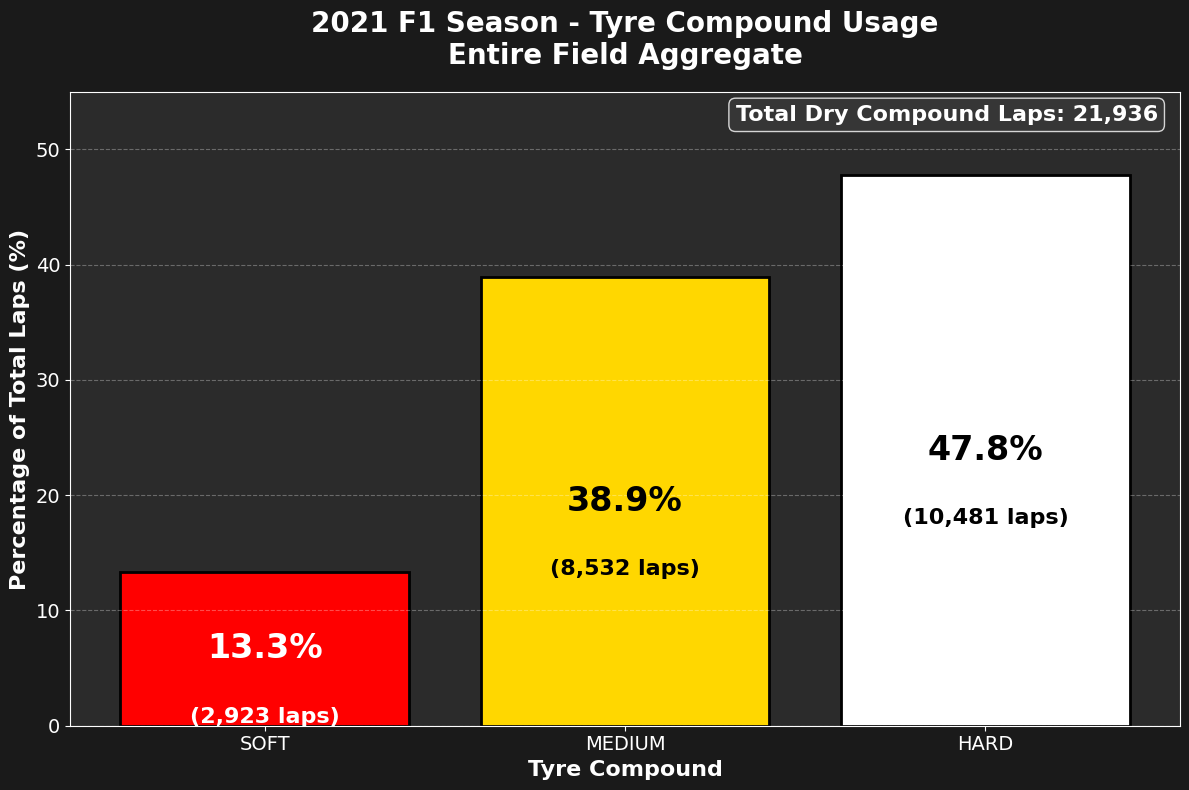

✓ Plot saved: ../f1_visualizations/2021_entire_field_tyre_usage.png


In [15]:
# Create bar plot for entire field tyre usage
fig, ax = plt.subplots(figsize=(12, 8), facecolor='#1a1a1a')
ax.set_facecolor('#2b2b2b')

# Define F1 tyre colors
tyre_colors = {
    'SOFT': '#FF0000',      # Red
    'MEDIUM': '#FFD700',    # Yellow/Gold
    'HARD': '#FFFFFF'       # White
}

# Order compounds
compounds = ['SOFT', 'MEDIUM', 'HARD']
percentages = [entire_field_df[entire_field_df['Compound'] == c]['Percentage'].values[0] for c in compounds]
total_laps = [entire_field_df[entire_field_df['Compound'] == c]['Total_Laps'].values[0] for c in compounds]
colors = [tyre_colors[c] for c in compounds]

# Create bars
bars = ax.bar(compounds, percentages, color=colors, edgecolor='black', linewidth=2)

# Add percentage labels on bars
for i, (bar, pct, laps) in enumerate(zip(bars, percentages, total_laps)):
    height = bar.get_height()
    # Percentage text
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f'{pct:.1f}%',
            ha='center', va='center', fontsize=24, fontweight='bold',
            color='black' if compounds[i] != 'SOFT' else 'white')
    
    # Total laps text below percentage
    ax.text(bar.get_x() + bar.get_width()/2., height/2 - 5,
            f'({laps:,} laps)',
            ha='center', va='top', fontsize=16, fontweight='bold',
            color='black' if compounds[i] != 'SOFT' else 'white')

# Styling
ax.set_ylabel('Percentage of Total Laps (%)', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Tyre Compound', fontsize=16, fontweight='bold', color='white')
ax.set_title('2021 F1 Season - Tyre Compound Usage\nEntire Field Aggregate', 
             fontsize=20, fontweight='bold', pad=20, color='white')
ax.set_ylim(0, max(percentages) * 1.15)
ax.tick_params(axis='both', labelsize=14, colors='white')
ax.grid(axis='y', alpha=0.3, linestyle='--', color='white')

# Change spine colors to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Add total laps info
total_info = f'Total Dry Compound Laps: {sum(total_laps):,}'
ax.text(0.98, 0.98, total_info, transform=ax.transAxes,
        fontsize=16, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='#3a3a3a', alpha=0.8, edgecolor='white'),
        color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('../f1_visualizations/2021_entire_field_tyre_usage.png', dpi=300, bbox_inches='tight', facecolor='#1a1a1a')
plt.show()

print("✓ Plot saved: ../f1_visualizations/2021_entire_field_tyre_usage.png")

In [17]:
### 7.2 Horizontal Stacked Bar Chart - Championship Leaders + Aggregates

# Comparing tyre usage for top 5 championship drivers, top 10 finishers, and entire field.

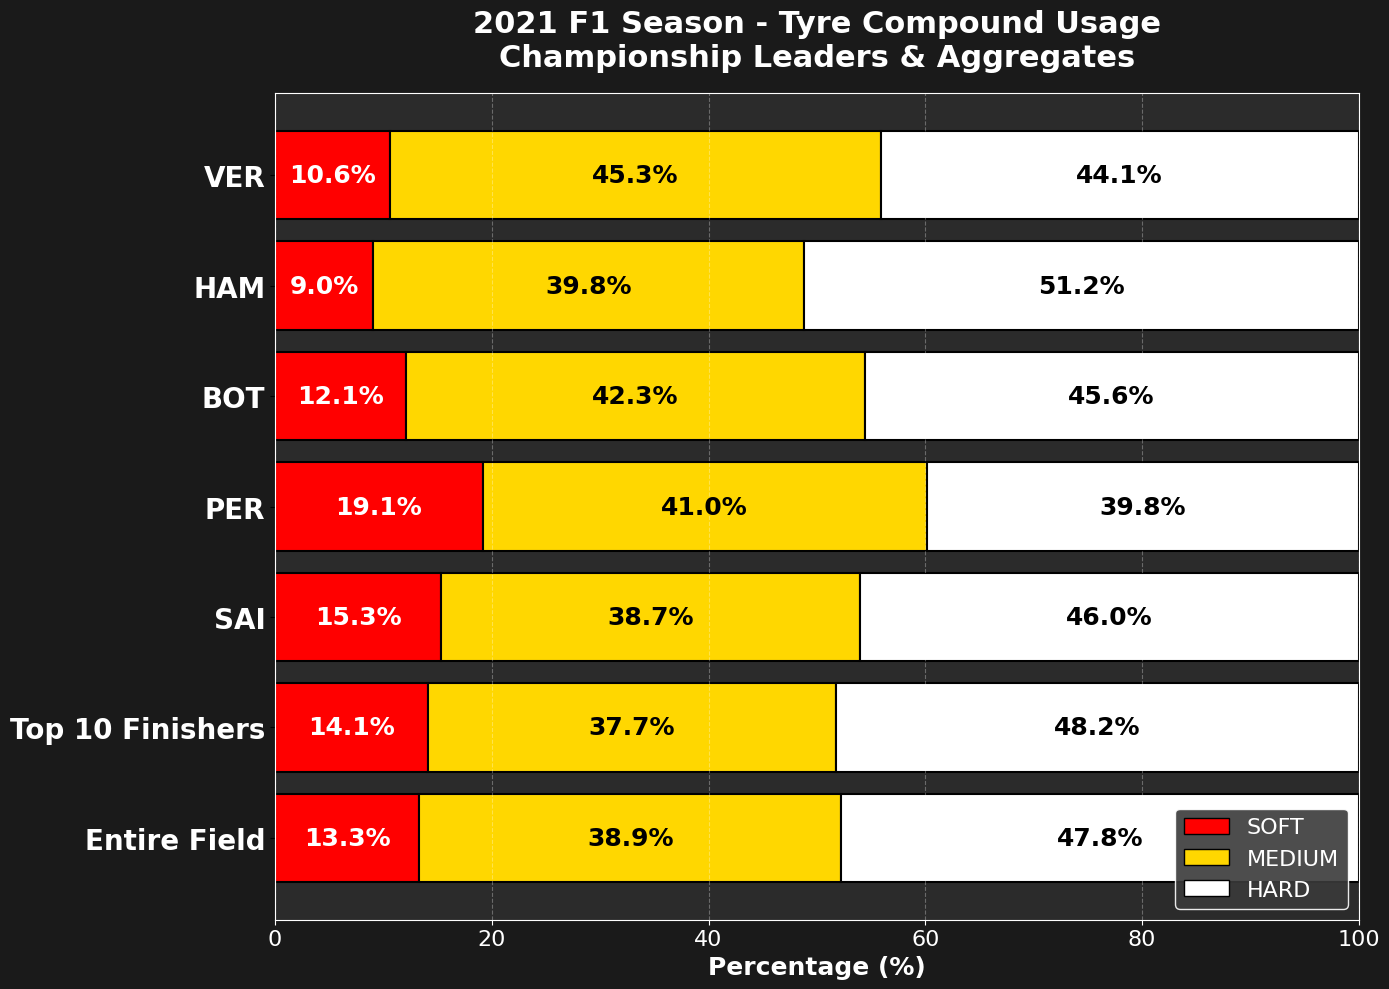

✓ Plot saved: ../f1_visualizations/2021_tyre_usage_stacked_comparison.png


In [18]:
# Create horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#1a1a1a')
ax.set_facecolor('#2b2b2b')

# Define F1 tyre colors
tyre_colors = {
    'SOFT': '#FF0000',      # Red
    'MEDIUM': '#FFD700',    # Yellow/Gold
    'HARD': '#FFFFFF'       # White
}

# Top 5 championship order (based on 2021 standings: VER, HAM, BOT, PER, SAI)
top_5_drivers = ['VER', 'HAM', 'BOT', 'PER', 'SAI']

# Prepare data for plotting
categories = []
soft_pcts = []
medium_pcts = []
hard_pcts = []

# Add top 5 drivers
for driver in top_5_drivers:
    driver_data = driver_level_df[driver_level_df['Driver'] == driver]
    if len(driver_data) > 0:
        categories.append(driver)
        soft_pcts.append(driver_data['SOFT_Pct'].values[0])
        medium_pcts.append(driver_data['MEDIUM_Pct'].values[0])
        hard_pcts.append(driver_data['HARD_Pct'].values[0])

# Add Top 10 Finishers
categories.append('Top 10 Finishers')
soft_pcts.append(top10_aggregate_df[top10_aggregate_df['Compound'] == 'SOFT']['Percentage'].values[0])
medium_pcts.append(top10_aggregate_df[top10_aggregate_df['Compound'] == 'MEDIUM']['Percentage'].values[0])
hard_pcts.append(top10_aggregate_df[top10_aggregate_df['Compound'] == 'HARD']['Percentage'].values[0])

# Add Entire Field
categories.append('Entire Field')
soft_pcts.append(entire_field_df[entire_field_df['Compound'] == 'SOFT']['Percentage'].values[0])
medium_pcts.append(entire_field_df[entire_field_df['Compound'] == 'MEDIUM']['Percentage'].values[0])
hard_pcts.append(entire_field_df[entire_field_df['Compound'] == 'HARD']['Percentage'].values[0])

# Reverse the order so VER is on top, Entire Field at bottom
categories.reverse()
soft_pcts.reverse()
medium_pcts.reverse()
hard_pcts.reverse()

# Create horizontal stacked bars
y_pos = np.arange(len(categories))

# Plot bars (stacked)
bar1 = ax.barh(y_pos, soft_pcts, color=tyre_colors['SOFT'], edgecolor='black', linewidth=1.5)
bar2 = ax.barh(y_pos, medium_pcts, left=soft_pcts, color=tyre_colors['MEDIUM'], edgecolor='black', linewidth=1.5)
bar3 = ax.barh(y_pos, hard_pcts, left=np.array(soft_pcts) + np.array(medium_pcts), 
               color=tyre_colors['HARD'], edgecolor='black', linewidth=1.5)

# Add percentage labels inside bars
for i in range(len(categories)):
    # SOFT label
    if soft_pcts[i] > 5:  # Only show if segment is large enough
        ax.text(soft_pcts[i]/2, i, f'{soft_pcts[i]:.1f}%', 
                ha='center', va='center', fontsize=18, fontweight='bold', color='white')
    
    # MEDIUM label
    if medium_pcts[i] > 5:
        ax.text(soft_pcts[i] + medium_pcts[i]/2, i, f'{medium_pcts[i]:.1f}%',
                ha='center', va='center', fontsize=18, fontweight='bold', color='black')
    
    # HARD label
    if hard_pcts[i] > 5:
        ax.text(soft_pcts[i] + medium_pcts[i] + hard_pcts[i]/2, i, f'{hard_pcts[i]:.1f}%',
                ha='center', va='center', fontsize=18, fontweight='bold', color='black')

# Styling
ax.set_yticks(y_pos)
ax.set_yticklabels(categories, fontsize=20, fontweight='bold', color='white')
ax.set_xlabel('Percentage (%)', fontsize=18, fontweight='bold', color='white')
ax.set_title('2021 F1 Season - Tyre Compound Usage\nChampionship Leaders & Aggregates', 
             fontsize=22, fontweight='bold', pad=20, color='white')
ax.set_xlim(0, 100)
ax.tick_params(axis='x', labelsize=16, colors='white')
ax.grid(axis='x', alpha=0.3, linestyle='--', color='white')

# Change spine colors
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=tyre_colors['SOFT'], edgecolor='black', label='SOFT'),
    Patch(facecolor=tyre_colors['MEDIUM'], edgecolor='black', label='MEDIUM'),
    Patch(facecolor=tyre_colors['HARD'], edgecolor='black', label='HARD')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=16, 
          framealpha=0.9, facecolor='#3a3a3a', edgecolor='white', labelcolor='white')

plt.tight_layout()
plt.savefig('../f1_visualizations/2021_tyre_usage_stacked_comparison.png', 
            dpi=300, bbox_inches='tight', facecolor='#1a1a1a')
plt.show()

print("✓ Plot saved: ../f1_visualizations/2021_tyre_usage_stacked_comparison.png")

## 8. Additional Statistics

### 8.1 Races with No Soft Tyre Usage

Check which races (if any) didn't see a single lap on soft tyres.

In [19]:
# Check races with zero soft tyre usage
races_no_soft = race_level_df[race_level_df['SOFT_Laps'] == 0]

print("="*80)
print(f"RACES WITH NO SOFT TYRE USAGE: {len(races_no_soft)}")
print("="*80)

if len(races_no_soft) > 0:
    print("\nRaces where soft tyres were NOT used:")
    print(races_no_soft[['Round', 'Race', 'Country', 'MEDIUM_Laps', 'HARD_Laps', 'Total_Laps']].to_string(index=False))
else:
    print("\n✓ All races saw at least some soft tyre usage!")

print("\n" + "="*80)
print(f"\nRaces with minimal soft usage (<5%):")
print("="*80)
minimal_soft = race_level_df[race_level_df['SOFT_Pct'] < 5.0].sort_values('SOFT_Pct')
if len(minimal_soft) > 0:
    print(minimal_soft[['Round', 'Race', 'SOFT_Pct', 'MEDIUM_Pct', 'HARD_Pct']].to_string(index=False))
else:
    print("No races with <5% soft usage")

RACES WITH NO SOFT TYRE USAGE: 1

Races where soft tyres were NOT used:
 Round               Race Country  MEDIUM_Laps  HARD_Laps  Total_Laps
    16 Turkish Grand Prix  Turkey            1          0           1


Races with minimal soft usage (<5%):
 Round                     Race  SOFT_Pct  MEDIUM_Pct  HARD_Pct
    16       Turkish Grand Prix  0.000000  100.000000  0.000000
    15       Russian Grand Prix  0.208768   36.221294 63.569937
    19     São Paulo Grand Prix  0.441176   44.705882 54.852941
    14       Italian Grand Prix  0.784753   50.672646 48.542601
    10       British Grand Prix  0.927835   46.082474 52.989691
    18   Mexico City Grand Prix  1.665345   43.061063 55.273592
    21 Saudi Arabian Grand Prix  1.775148   50.059172 48.165680
     7        French Grand Prix  1.807802   36.917222 61.274976
    17 United States Grand Prix  1.915709   33.620690 64.463602
    11     Hungarian Grand Prix  1.927195   41.970021 56.102784
     9      Austrian Grand Prix  4.185351   3

### 8.2 Average Laps Per Compound Per Race

Calculate the average number of laps driven on each compound per race.

In [20]:
# Calculate average laps per compound per race for ENTIRE FIELD
num_races = len(race_level_df)

entire_field_avg_laps = {
    'SOFT': entire_field_stats['SOFT'] / num_races,
    'MEDIUM': entire_field_stats['MEDIUM'] / num_races,
    'HARD': entire_field_stats['HARD'] / num_races
}

print("="*80)
print("ENTIRE FIELD - AVERAGE LAPS PER COMPOUND PER RACE")
print("="*80)
print(f"\nTotal races: {num_races}")
print(f"Total dry compound laps: {total_dry_laps:,}")
print(f"Average dry laps per race: {total_dry_laps / num_races:.1f}")
print()
print(f"  SOFT    : {entire_field_avg_laps['SOFT']:6.1f} laps/race ({entire_field_percentages['SOFT']:5.1f}%)")
print(f"  MEDIUM  : {entire_field_avg_laps['MEDIUM']:6.1f} laps/race ({entire_field_percentages['MEDIUM']:5.1f}%)")
print(f"  HARD    : {entire_field_avg_laps['HARD']:6.1f} laps/race ({entire_field_percentages['HARD']:5.1f}%)")
print("="*80)

ENTIRE FIELD - AVERAGE LAPS PER COMPOUND PER RACE

Total races: 21
Total dry compound laps: 21,936
Average dry laps per race: 1044.6

  SOFT    :  139.2 laps/race ( 13.3%)
  MEDIUM  :  406.3 laps/race ( 38.9%)
  HARD    :  499.1 laps/race ( 47.8%)


In [21]:
# Calculate average laps per compound per race for TOP 10 FINISHERS
top10_avg_laps = {
    'SOFT': top10_stats['SOFT'] / num_races,
    'MEDIUM': top10_stats['MEDIUM'] / num_races,
    'HARD': top10_stats['HARD'] / num_races
}

print("="*80)
print("TOP 10 FINISHERS - AVERAGE LAPS PER COMPOUND PER RACE")
print("="*80)
print(f"\nTotal races: {num_races}")
print(f"Total dry compound laps (top 10): {total_top10_laps:,}")
print(f"Average dry laps per race: {total_top10_laps / num_races:.1f}")
print()
print(f"  SOFT    : {top10_avg_laps['SOFT']:6.1f} laps/race ({top10_percentages['SOFT']:5.1f}%)")
print(f"  MEDIUM  : {top10_avg_laps['MEDIUM']:6.1f} laps/race ({top10_percentages['MEDIUM']:5.1f}%)")
print(f"  HARD    : {top10_avg_laps['HARD']:6.1f} laps/race ({top10_percentages['HARD']:5.1f}%)")
print("="*80)

TOP 10 FINISHERS - AVERAGE LAPS PER COMPOUND PER RACE

Total races: 21
Total dry compound laps (top 10): 11,997
Average dry laps per race: 571.3

  SOFT    :   80.7 laps/race ( 14.1%)
  MEDIUM  :  215.1 laps/race ( 37.7%)
  HARD    :  275.5 laps/race ( 48.2%)


In [22]:
# Calculate average laps per compound per race for INDIVIDUAL DRIVERS
# First, count how many races each driver participated in
driver_race_counts = dry_laps_df.groupby('Driver')['RoundNumber'].nunique().to_dict()

# Calculate average laps per race for each driver
driver_avg_stats = []

for driver in sorted(driver_level_df['Driver'].unique()):
    driver_data = driver_level_df[driver_level_df['Driver'] == driver].iloc[0]
    races_participated = driver_race_counts[driver]
    
    avg_soft = driver_data['SOFT_Laps'] / races_participated
    avg_medium = driver_data['MEDIUM_Laps'] / races_participated
    avg_hard = driver_data['HARD_Laps'] / races_participated
    avg_total = driver_data['Total_Laps'] / races_participated
    
    driver_avg_stats.append({
        'Driver': driver,
        'Races': races_participated,
        'Avg_SOFT': avg_soft,
        'Avg_MEDIUM': avg_medium,
        'Avg_HARD': avg_hard,
        'Avg_Total': avg_total,
        'SOFT_Pct': driver_data['SOFT_Pct'],
        'MEDIUM_Pct': driver_data['MEDIUM_Pct'],
        'HARD_Pct': driver_data['HARD_Pct']
    })

driver_avg_df = pd.DataFrame(driver_avg_stats)
driver_avg_df = driver_avg_df.sort_values('Avg_Total', ascending=False)

print("="*120)
print("ALL DRIVERS - AVERAGE LAPS PER COMPOUND PER RACE")
print("="*120)
print(driver_avg_df.to_string(index=False))
print("="*120)

ALL DRIVERS - AVERAGE LAPS PER COMPOUND PER RACE
Driver  Races  Avg_SOFT  Avg_MEDIUM  Avg_HARD  Avg_Total  SOFT_Pct  MEDIUM_Pct  HARD_Pct
   KUB      2  0.000000   33.500000 28.000000  61.500000  0.000000   54.471545 45.528455
   SAI     20  9.200000   23.200000 27.600000  60.000000 15.333333   38.666667 46.000000
   NOR     19 11.789474   17.842105 29.947368  59.578947 19.787986   29.946996 50.265018
   LAT     19  4.368421   20.684211 34.526316  59.578947  7.332155   34.717314 57.950530
   HAM     20  5.300000   23.350000 30.050000  58.700000  9.028961   39.778535 51.192504
   RIC     20  7.750000   21.350000 29.600000  58.700000 13.202726   36.371380 50.425894
   GIO     20  5.700000   22.300000 30.300000  58.300000  9.777015   38.250429 51.972556
   ALO     20  9.000000   24.350000 24.900000  58.250000 15.450644   41.802575 42.746781
   PER     19 11.052632   23.684211 23.000000  57.736842 19.143118   41.020966 39.835916
   STR     19 11.105263   18.210526 27.526316  56.842105 19.5

In [23]:
# Focus on top 5 championship drivers
top_5_drivers = ['VER', 'HAM', 'BOT', 'PER', 'SAI']
top_5_avg_df = driver_avg_df[driver_avg_df['Driver'].isin(top_5_drivers)]

# Reorder to championship order
top_5_avg_df = top_5_avg_df.set_index('Driver').loc[top_5_drivers].reset_index()

print("\n" + "="*120)
print("TOP 5 CHAMPIONSHIP DRIVERS - AVERAGE LAPS PER COMPOUND PER RACE")
print("="*120)
print(top_5_avg_df.to_string(index=False))
print("="*120)

print("\n📊 INSIGHTS:")
print("-" * 80)
for _, driver in top_5_avg_df.iterrows():
    print(f"\n{driver['Driver']} ({driver['Races']} races):")
    print(f"  Average: {driver['Avg_SOFT']:.1f} soft | {driver['Avg_MEDIUM']:.1f} medium | {driver['Avg_HARD']:.1f} hard")
    print(f"  Total avg laps/race: {driver['Avg_Total']:.1f}")


TOP 5 CHAMPIONSHIP DRIVERS - AVERAGE LAPS PER COMPOUND PER RACE
Driver  Races  Avg_SOFT  Avg_MEDIUM  Avg_HARD  Avg_Total  SOFT_Pct  MEDIUM_Pct  HARD_Pct
   VER     20  5.950000   25.350000 24.700000  56.000000 10.625000   45.267857 44.107143
   HAM     20  5.300000   23.350000 30.050000  58.700000  9.028961   39.778535 51.192504
   BOT     19  6.631579   23.263158 25.052632  54.947368 12.068966   42.337165 45.593870
   PER     19 11.052632   23.684211 23.000000  57.736842 19.143118   41.020966 39.835916
   SAI     20  9.200000   23.200000 27.600000  60.000000 15.333333   38.666667 46.000000

📊 INSIGHTS:
--------------------------------------------------------------------------------

VER (20 races):
  Average: 6.0 soft | 25.4 medium | 24.7 hard
  Total avg laps/race: 56.0

HAM (20 races):
  Average: 5.3 soft | 23.4 medium | 30.1 hard
  Total avg laps/race: 58.7

BOT (19 races):
  Average: 6.6 soft | 23.3 medium | 25.1 hard
  Total avg laps/race: 54.9

PER (19 races):
  Average: 11.1 s

## 9. Sector & Mini Sector Analysis (Qatar 2025 Qualifying)

Testing FastF1's sector and mini sector capabilities to build theoretical fastest laps.

In [1]:
# Load Qatar 2025 Qualifying session to explore sector data
print("Loading Qatar 2025 Qualifying session...")
qatar_quali = fastf1.get_session(2025, 'Qatar', 'Q')
qatar_quali.load()

print(f"✓ Session loaded: {qatar_quali.event['EventName']} - {qatar_quali.name}")
print(f"Total laps in session: {len(qatar_quali.laps)}")

# Let's examine what columns are available in the laps data
print("\n" + "="*80)
print("AVAILABLE COLUMNS IN LAPS DATA:")
print("="*80)
for col in sorted(qatar_quali.laps.columns):
    print(f"  - {col}")
print("="*80)

Loading Qatar 2025 Qualifying session...


NameError: name 'fastf1' is not defined

In [ ]:
# Check for sector and mini sector columns
print("="*80)
print("SECTOR DATA AVAILABILITY CHECK:")
print("="*80)

# Check for sector times
sector_cols = [col for col in qatar_quali.laps.columns if 'sector' in col.lower()]
print(f"\nSector-related columns found: {len(sector_cols)}")
for col in sector_cols:
    print(f"  ✓ {col}")

# Get a sample lap to inspect data
sample_lap = qatar_quali.laps.iloc[0]
print("\n" + "="*80)
print("SAMPLE LAP DATA (First lap):")
print("="*80)
print(f"Driver: {sample_lap['Driver']}")
print(f"Lap Number: {sample_lap['LapNumber']}")
print(f"Lap Time: {sample_lap['LapTime']}")

# Check sector times
if 'Sector1Time' in qatar_quali.laps.columns:
    print(f"Sector 1: {sample_lap['Sector1Time']}")
if 'Sector2Time' in qatar_quali.laps.columns:
    print(f"Sector 2: {sample_lap['Sector2Time']}")
if 'Sector3Time' in qatar_quali.laps.columns:
    print(f"Sector 3: {sample_lap['Sector3Time']}")

# Check for session atoms/mini sectors
print("\n" + "="*80)
print("Checking for telemetry and mini sector data...")
print("="*80)

# Try to get telemetry for a lap
try:
    telemetry = sample_lap.get_telemetry()
    print(f"✓ Telemetry available with {len(telemetry)} data points")
    print(f"Telemetry columns: {list(telemetry.columns)}")
except Exception as e:
    print(f"✗ Telemetry error: {e}")

In [ ]:
# Function to find theoretical fastest lap using best sectors
def calculate_theoretical_fastest_lap(driver_laps):
    """
    Calculate theoretical fastest lap from best sectors across all laps.
    
    Parameters:
    driver_laps: DataFrame of laps for a single driver
    
    Returns:
    Dictionary with theoretical lap time and sector breakdown
    """
    # Filter out invalid laps
    valid_laps = driver_laps[
        (driver_laps['Sector1Time'].notna()) & 
        (driver_laps['Sector2Time'].notna()) & 
        (driver_laps['Sector3Time'].notna())
    ].copy()
    
    if len(valid_laps) == 0:
        return None
    
    # Find fastest sectors
    fastest_s1 = valid_laps['Sector1Time'].min()
    fastest_s2 = valid_laps['Sector2Time'].min()
    fastest_s3 = valid_laps['Sector3Time'].min()
    
    # Calculate theoretical lap time
    theoretical_time = fastest_s1 + fastest_s2 + fastest_s3
    
    # Get actual fastest lap
    actual_fastest = valid_laps['LapTime'].min()
    
    # Find which laps had the fastest sectors
    s1_lap = valid_laps[valid_laps['Sector1Time'] == fastest_s1]['LapNumber'].iloc[0]
    s2_lap = valid_laps[valid_laps['Sector2Time'] == fastest_s2]['LapNumber'].iloc[0]
    s3_lap = valid_laps[valid_laps['Sector3Time'] == fastest_s3]['LapNumber'].iloc[0]
    
    return {
        'theoretical_time': theoretical_time,
        'actual_fastest': actual_fastest,
        'time_delta': theoretical_time - actual_fastest,
        'fastest_s1': fastest_s1,
        'fastest_s2': fastest_s2,
        'fastest_s3': fastest_s3,
        's1_lap_num': s1_lap,
        's2_lap_num': s2_lap,
        's3_lap_num': s3_lap,
        'same_lap': (s1_lap == s2_lap == s3_lap)
    }

print("✓ Function 'calculate_theoretical_fastest_lap()' defined")

In [ ]:
# Analyze all drivers in Qatar 2025 Qualifying
print("="*100)
print("QATAR 2025 QUALIFYING - THEORETICAL FASTEST LAP ANALYSIS")
print("="*100)

results = []

# Get all unique drivers
drivers = sorted(qatar_quali.laps['Driver'].unique())

for driver in drivers:
    driver_laps = qatar_quali.laps[qatar_quali.laps['Driver'] == driver]
    
    result = calculate_theoretical_fastest_lap(driver_laps)
    
    if result:
        results.append({
            'Driver': driver,
            'Actual_Fastest': result['actual_fastest'],
            'Theoretical_Fastest': result['theoretical_time'],
            'Time_Delta': result['time_delta'],
            'Delta_ms': result['time_delta'].total_seconds() * 1000,
            'Same_Lap': result['same_lap'],
            'S1': result['fastest_s1'],
            'S2': result['fastest_s2'],
            'S3': result['fastest_s3'],
            'S1_Lap': result['s1_lap_num'],
            'S2_Lap': result['s2_lap_num'],
            'S3_Lap': result['s3_lap_num']
        })

# Create DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Actual_Fastest')

print(f"\nAnalyzed {len(results_df)} drivers\n")
print(results_df.to_string(index=False))
print("\n" + "="*100)

In [ ]:
# Detailed analysis for top 5 drivers
print("="*100)
print("DETAILED BREAKDOWN - TOP 5 DRIVERS")
print("="*100)

top_5_drivers = results_df.head(5)['Driver'].tolist()

for driver in top_5_drivers:
    driver_data = results_df[results_df['Driver'] == driver].iloc[0]
    
    print(f"\n{'─'*100}")
    print(f"🏎️  {driver}")
    print(f"{'─'*100}")
    print(f"Actual Fastest Lap:       {driver_data['Actual_Fastest']}")
    print(f"Theoretical Fastest Lap:  {driver_data['Theoretical_Fastest']}")
    print(f"Time Delta:               {driver_data['Delta_ms']:.3f} ms")
    print(f"All sectors in same lap:  {'✓ YES' if driver_data['Same_Lap'] else '✗ NO'}")
    print(f"\nBest Sectors:")
    print(f"  Sector 1: {driver_data['S1']} (Lap {driver_data['S1_Lap']})")
    print(f"  Sector 2: {driver_data['S2']} (Lap {driver_data['S2_Lap']})")
    print(f"  Sector 3: {driver_data['S3']} (Lap {driver_data['S3_Lap']})")
    
    if not driver_data['Same_Lap']:
        print(f"\n  💡 Could have been {driver_data['Delta_ms']:.3f} ms faster by stitching sectors!")

print(f"\n{'='*100}")

In [ ]:
# Now let's explore mini sectors (if available)
print("="*100)
print("EXPLORING MINI SECTOR / SPEED TRAP DATA")
print("="*100)

# Check if there are speed trap columns
speed_cols = [col for col in qatar_quali.laps.columns if 'speed' in col.lower() or 'trap' in col.lower()]

print(f"\nSpeed-related columns found: {len(speed_cols)}")
for col in speed_cols:
    sample_value = qatar_quali.laps[col].iloc[0] if len(qatar_quali.laps) > 0 else None
    print(f"  ✓ {col}: {sample_value}")

# Check telemetry for more granular data
print("\n" + "="*100)
print("TELEMETRY DATA EXPLORATION (for mini sectors)")
print("="*100)

# Get a fast lap from pole sitter
fastest_lap = qatar_quali.laps.pick_fastest()
print(f"\nFastest lap overall:")
print(f"  Driver: {fastest_lap['Driver']}")
print(f"  Lap Time: {fastest_lap['LapTime']}")
print(f"  Lap Number: {fastest_lap['LapNumber']}")

try:
    # Get telemetry
    tel = fastest_lap.get_telemetry()
    print(f"\n✓ Telemetry loaded: {len(tel)} data points")
    print(f"\nTelemetry columns:")
    for col in tel.columns:
        print(f"  - {col}")
    
    # Check for mini sector markers
    if 'SessionTime' in tel.columns:
        print(f"\n✓ SessionTime available (can be used for micro-sector analysis)")
    if 'Distance' in tel.columns:
        print(f"✓ Distance available (can divide track into custom segments)")
    if 'Speed' in tel.columns:
        print(f"✓ Speed data available")
        print(f"  Max speed: {tel['Speed'].max():.1f} km/h")
        print(f"  Min speed: {tel['Speed'].min():.1f} km/h")
    
except Exception as e:
    print(f"\n✗ Error loading telemetry: {e}")

print("\n" + "="*100)

### Summary of Capabilities

Based on the exploration above, FastF1 provides:

1. **Standard Sectors (1, 2, 3)** ✅
   - Sector1Time, Sector2Time, Sector3Time are available
   - Can calculate theoretical fastest lap by stitching best sectors
   
2. **Mini Sectors** 
   - Not directly available as pre-calculated fields
   - BUT can be created using telemetry data:
     - `Distance` - track position
     - `SessionTime` - timing
     - `Speed` - speed at each point
   - You can divide the track into custom mini-sectors (e.g., every 100m or every 5 seconds)
   
3. **Analysis Possibilities**:
   - ✅ Best Sector 1, 2, 3 across all laps
   - ✅ Theoretical fastest lap from stitched sectors
   - ✅ Identify which laps contributed best sectors
   - ✅ Create custom mini-sectors from telemetry
   - ✅ Speed trap data at specific points